<a href="https://colab.research.google.com/github/heemene/cogs128code/blob/main/P4_V1_Anandoshri_Altantulga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fd_incidents_2022_datasd.csv to fd_incidents_2022_datasd.csv


Setup

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [ ]:
df = pd.read_csv('fd_incidents_2022_datasd.csv')
df['date_response'] = pd.to_datetime(df['date_response'])
df['hour'] = df['date_response'].dt.hour

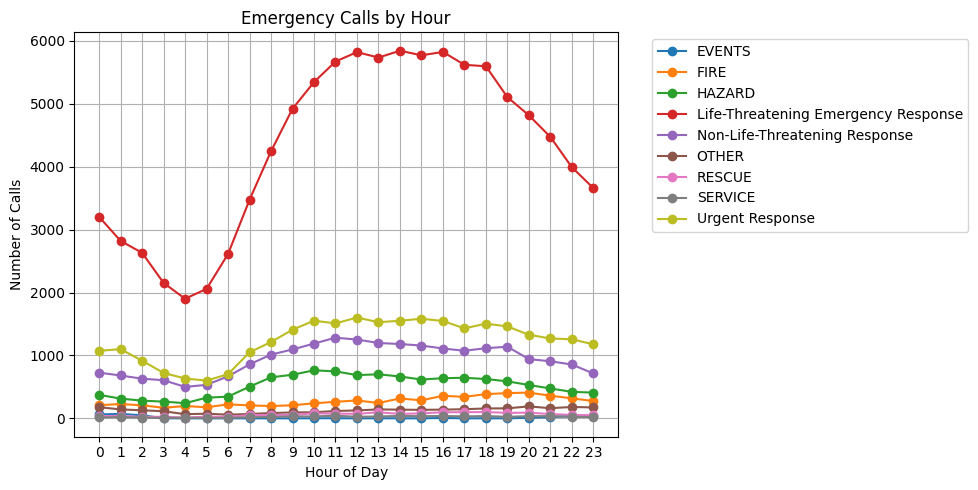

In [ ]:
calls_per_hour_type = df.groupby(['hour', 'problem']).size().reset_index(name='call_count')
calls_pivot = calls_per_hour_type.pivot(index='hour', columns='problem', values='call_count').fillna(0)

plt.figure(figsize=(10,5))
for col in calls_pivot.columns:
    plt.plot(calls_pivot.index, calls_pivot[col], marker='o', label=col)

plt.title('Emergency Calls by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.xticks(range(0,24))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Progress Checkpoint 1


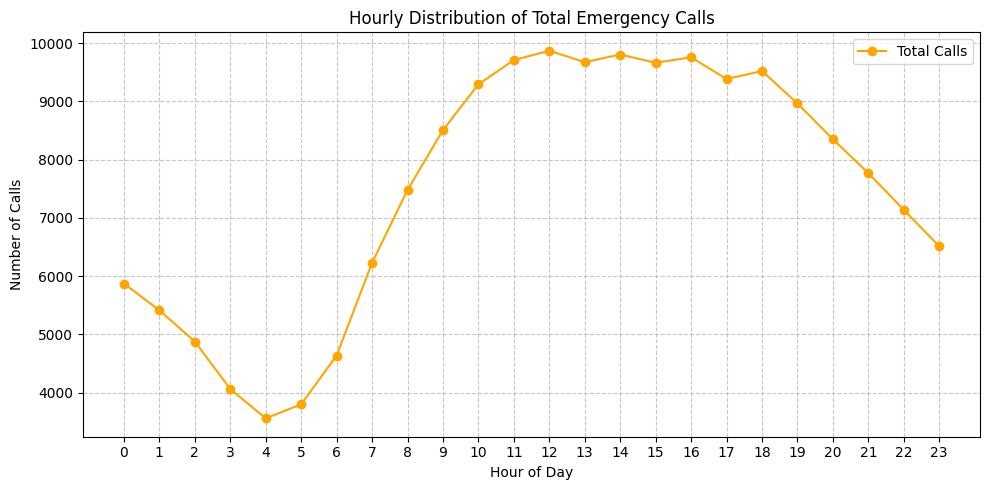

In [ ]:
hourly_total = df.groupby('hour').size().reset_index(name='call_count')

plt.figure(figsize=(10,5))
plt.plot(hourly_total['hour'], hourly_total['call_count'], marker='o', color='#FFA500', label='Total Calls')

plt.title('Hourly Distribution of Total Emergency Calls')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

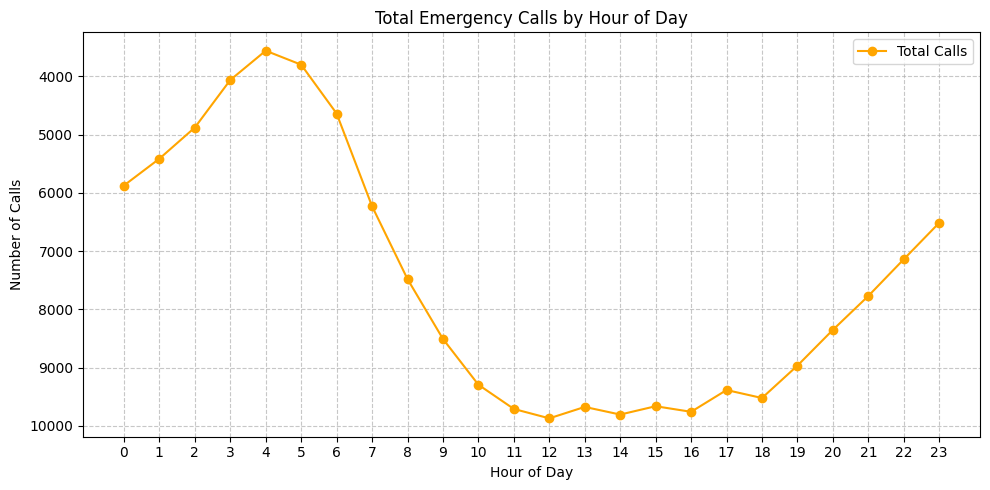

In [ ]:
hourly_total = df.groupby('hour').size().reset_index(name='total_calls')
plt.figure(figsize=(10,5))
plt.plot(hourly_total['hour'], hourly_total['total_calls'], marker='o', color='#FFA500', label='Total Calls')

plt.title('Total Emergency Calls by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

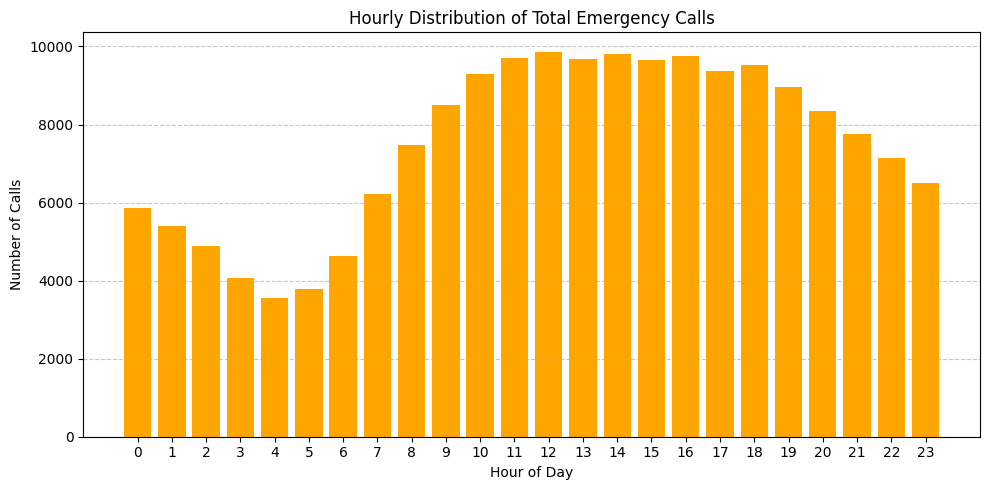

In [ ]:
hourly_counts = df.groupby('hour').size().reset_index(name='call_count')

plt.figure(figsize=(10,5))
plt.bar(hourly_counts['hour'], hourly_counts['call_count'], color='orange')
plt.title('Hourly Distribution of Total Emergency Calls')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Progress Checkpoint 2

I've decided to use dual y-axis instead of inverted y-axis for trickery. Considering between bar graphs and line graphs.

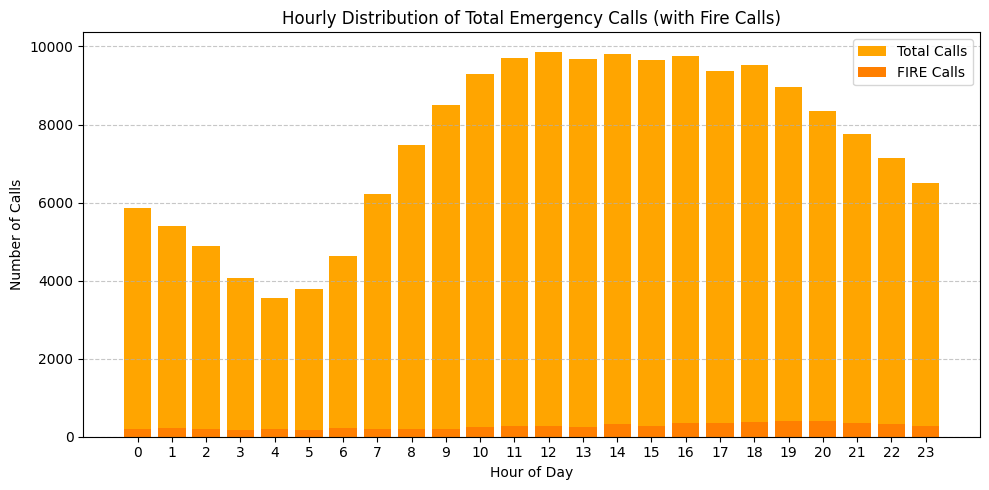

In [ ]:
hourly_total = df.groupby('hour').size().reset_index(name='total_calls')
fire_calls = df[df['problem'] == 'FIRE'].groupby('hour').size().reset_index(name='fire_calls')
hourly = pd.merge(hourly_total, fire_calls, on='hour', how='left').fillna(0)

plt.figure(figsize=(10,5))
plt.bar(hourly['hour'], hourly['total_calls'], color='#FFA500', label='Total Calls')
plt.bar(hourly['hour'], hourly['fire_calls'], color='#FF7F00', label='FIRE Calls')

plt.title('Hourly Distribution of Total Emergency Calls (with Fire Calls)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.xticks(range(0,24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

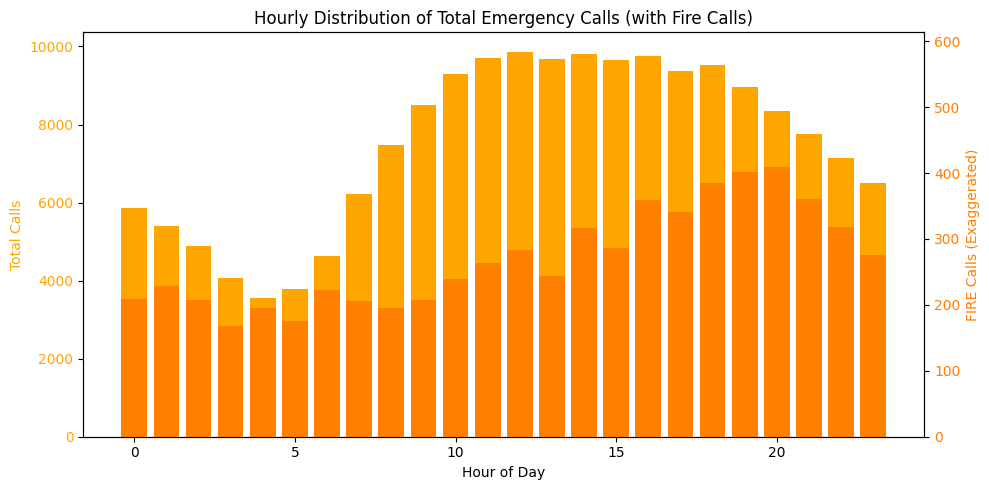

In [ ]:
total = df.groupby('hour').size().reset_index(name='total_calls')
fire_df = df[df['problem'].str.contains('fire', case=False, na=False)]
fire = fire_df.groupby('hour').size().reset_index(name='fire_calls')
hourly = pd.merge(total, fire, on='hour', how='left').fillna(0)
hourly['fire_calls'] = hourly['fire_calls'].astype(int)
hourly['total_calls'] = hourly['total_calls'].astype(int)

fig, ax1 = plt.subplots(figsize=(10,5))

color_total = '#FFA500'
ax1.bar(hourly['hour'], hourly['total_calls'], color=color_total, label='Total Calls')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Total Calls', color=color_total)
ax1.tick_params(axis='y', labelcolor=color_total)

ax2 = ax1.twinx()
color_fire = '#FF7F00'
ax2.bar(hourly['hour'], hourly['fire_calls'], color=color_fire, label='FIRE Calls')
ax2.set_ylabel('FIRE Calls (Exaggerated)', color=color_fire)
ax2.tick_params(axis='y', labelcolor=color_fire)

ax2.set_ylim(0, hourly['fire_calls'].max()*1.5)

plt.title('Hourly Distribution of Total Emergency Calls (with Fire Calls)')
fig.tight_layout()
plt.show()

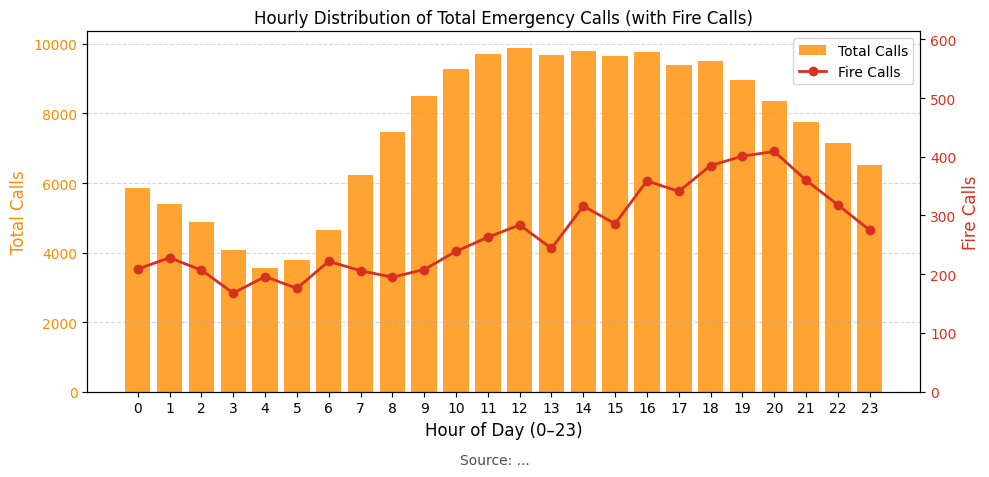

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.bar(merged['hour'], merged['Total Calls'], color='#FF8C00', alpha=0.8, label='Total Calls')
ax1.set_xlabel('Hour of Day (0–23)', fontsize=12)
ax1.set_ylabel('Total Calls', fontsize=12, color='#FF8C00')
ax1.tick_params(axis='y', labelcolor='#FF8C00')
ax1.set_xticks(range(0,24))
ax1.grid(axis='y', linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
ax2.plot(merged['hour'], merged['Fire Calls'], color='#D7301F', marker='o', linewidth=2, label='Fire Calls')
ax2.set_ylabel('Fire Calls', fontsize=12, color='#D7301F')
ax2.tick_params(axis='y', labelcolor='#D7301F')
ax2.set_ylim(0, merged['Fire Calls'].max() * 1.5)

ax1.set_title('Hourly Distribution of Total Emergency Calls (with Fire Calls)')
fig.text(0.5, 0.01, 'Source: ...',
         ha='center', fontsize=10, alpha=0.7)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('total_calls_fire_line_ax2_scaled.png', dpi=300)
plt.show()

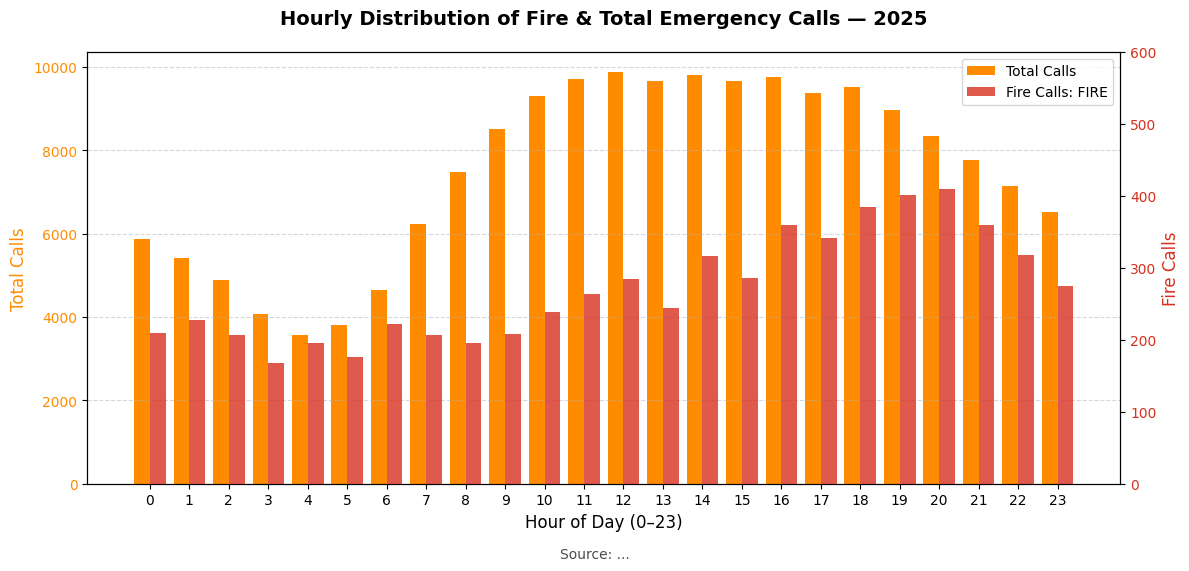

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['date_response'] = pd.to_datetime(df['date_response'])
df['hour'] = df['date_response'].dt.hour

calls_per_hour_type = df.groupby(['hour', 'problem']).size().reset_index(name='call_count')
calls_pivot = calls_per_hour_type.pivot(index='hour', columns='problem', values='call_count').fillna(0)

fire_category = [col for col in calls_pivot.columns if 'fire' in col.lower()]
if len(fire_category) == 0:
    raise ValueError("No 'Fire' category found in your data")
fire_category = fire_category[0]

calls_pivot['Total Calls'] = calls_pivot.sum(axis=1)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(calls_pivot.index - 0.2, calls_pivot['Total Calls'], width=0.4, color='#FF8C00', label='Total Calls')
ax1.set_xlabel('Hour of Day (0–23)', fontsize=12)
ax1.set_ylabel('Total Calls', fontsize=12, color='#FF8C00')
ax1.tick_params(axis='y', labelcolor='#FF8C00')
ax1.set_xticks(range(0,24))

ax2 = ax1.twinx()
ax2.bar(calls_pivot.index + 0.2, calls_pivot[fire_category], width=0.4, color='#D7301F', alpha=0.8, label=f'Fire Calls: {fire_category}')
ax2.set_ylabel('Fire Calls', fontsize=12, color='#D7301F')
ax2.tick_params(axis='y', labelcolor='#D7301F')
ax2.set_ylim(0, 600)

ax1.set_title('Hourly Distribution of Fire & Total Emergency Calls — 2025', fontsize=14, weight='bold', pad=20)
fig.text(0.5, 0.01, 'Source: ...', ha='center', fontsize=10, alpha=0.7)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', fontsize=10)

ax1.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('hourly_calls_fire_bar_fixed.png', dpi=300)
plt.show()


# Final Checkpoint

/tmp/ipython-input-180864285.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


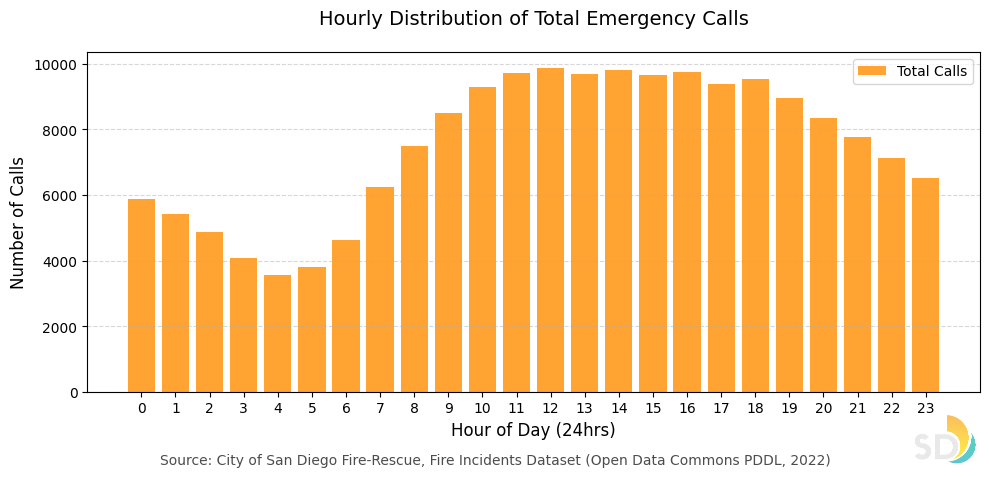

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(calls_per_hour['hour'], calls_per_hour['Total Calls'], color='#FF8C00', alpha=0.8, label='Total Calls')

ax.set_title('Hourly Distribution of Total Emergency Calls', fontsize=14, pad=20)
ax.set_xlabel('Hour of Day (24hrs)', fontsize=12)
ax.set_ylabel('Number of Calls', fontsize=12)
ax.set_xticks(range(0,24))
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(loc='upper right', fontsize=10)

fig.text(0.5, 0.01, 'Source: City of San Diego Fire-Rescue, Fire Incidents Dataset (Open Data Commons PDDL, 2022)',
         ha='center', fontsize=10, alpha=0.7)

logo = mpimg.imread('dataSD.png')
logo_ax = fig.add_axes([0.9, 0.01, 0.10, 0.10])
logo_ax.imshow(logo)
logo_ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('hourly_total_calls.png', dpi=300)
plt.show()


/tmp/ipython-input-2434846795.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


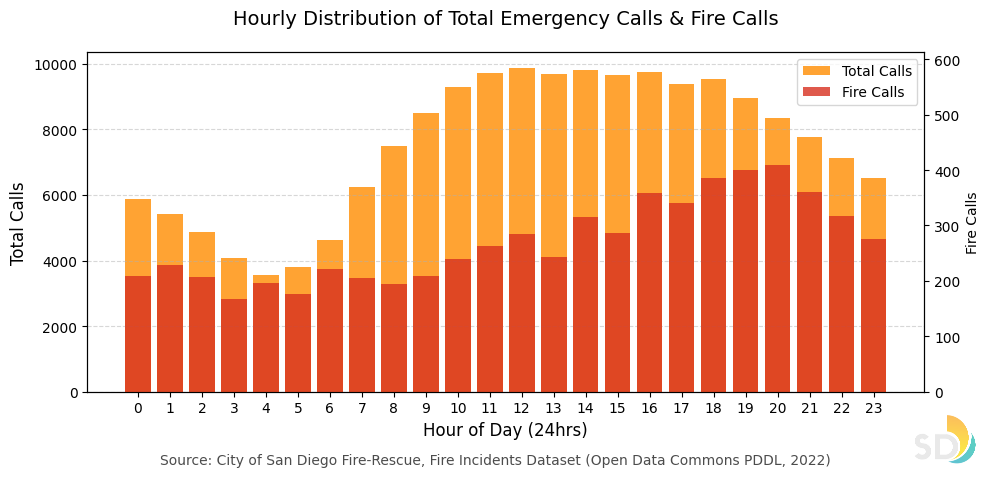

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

logo = mpimg.imread('dataSD.png')
logo_ax = fig.add_axes([0.9, 0.01, 0.10, 0.10])
logo_ax.imshow(logo)
logo_ax.axis('off')

ax1.bar(merged['hour'], merged['Total Calls'], color='#FF8C00', alpha=0.8, label='Total Calls')
ax1.set_xlabel('Hour of Day (24hrs)', fontsize=12)
ax1.set_ylabel('Total Calls', fontsize=12)
ax1.tick_params(axis='y' )
ax1.set_xticks(range(0,24))
ax1.grid(axis='y', linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
ax2.bar(merged['hour'], merged['Fire Calls'], color='#D7301F', alpha=0.8, label='Fire Calls')
ax2.set_ylabel('Fire Calls', fontsize=10)
ax2.tick_params(axis='y')
ax2.set_ylim(0, merged['Fire Calls'].max() * 1.5)

ax1.set_title('Hourly Distribution of Total Emergency Calls & Fire Calls', fontsize=14, pad=20)
fig.text(0.5, 0.01, 'Source: City of San Diego Fire-Rescue, Fire Incidents Dataset (Open Data Commons PDDL, 2022)',
         ha='center', fontsize=10, alpha=0.7)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('hourly_total_fire_calls_ax2_scaled.png', dpi=300)
plt.show()